# Visualize EDS Mappings 
**Author:** Lukas Grünewald  
**Last edited:** 27.10.23  
**HyperSpy Version:** 1.7.5

### Purpose:
This notebook collects ideas to visualize element maps loaded from `.hspy` signals.

# Packages

In [1]:
# Use watermark package to document package versions and hardware info
%load_ext watermark
# We use the widget backend for the explained notebooks
# Use qt for actual use with traitsui elements
%matplotlib widget

# Main packages
import hyperspy.api as hs
import hyperspy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Extras
#from scipy.ndimage import rotate
#from tifffile import imwrite
import glasbey
import seaborn as sns
import os
import glob
from pathlib import Path # Deal with Windows/Unix path issues

In [2]:
%watermark -i -v -u -m --iversions

Last updated: 2023-10-27T10:41:32.109091+02:00

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.16.1

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 6.5.8-100.fc37.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

hyperspy  : 1.7.5
matplotlib: 3.8.0
numpy     : 1.24.4
glasbey   : 0.2.0
seaborn   : 0.13.0



## Load data

In [3]:
files  = list(Path('example_data/Elemental_Maps/hspy').glob('*.hspy'))

In [4]:
# Note that the last two elements are fitted Ba_La and Ti_Ka signals due to their peak overlap
files

[PosixPath('example_data/Elemental_Maps/hspy/Sr_Ka.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/Ba_La.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/Cu_Ka.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/Er_La.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/O_Ka.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/Ti_Ka.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/Y_Ka.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/Ba_La-fit.hspy'),
 PosixPath('example_data/Elemental_Maps/hspy/Ti_Ka-fit.hspy')]

In [5]:
# Load signals into a list
s = hs.load(files)

# Basic plotting with HyperSpy's `plot_images`

Elemental maps are typically plotted with a linear segmented colormap ranging from black (= no element signal) to a color (= element signal).  
HyperSpy provides a fast method to visualize a list of signals with `hs.plot.plot_images()` ([docs](https://hyperspy.org/hyperspy-doc/current/api/hyperspy.drawing.utils.html#hyperspy.drawing.utils.plot_images))

[<Axes: title={'center': 'X-ray line intensity of EDX\nmodel from decomposition with\ncomponents [0, 1, 2, 3, 4, 5,\n6]: Sr_Ka at 14.16 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'X-ray line intensity of EDX\nmodel from decomposition with\ncomponents [0, 1, 2, 3, 4, 5,\n6]: Ba_La at 4.47 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'X-ray line intensity of EDX\nmodel from decomposition with\ncomponents [0, 1, 2, 3, 4, 5,\n6]: Cu_Ka at 8.05 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'X-ray line intensity of EDX\nmodel from decomposition with\ncomponents [0, 1, 2, 3, 4, 5,\n6]: Er_La at 6.95 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'X-ray line intensity of EDX\nmodel from decomposition with\ncomponents [0, 1, 2, 3, 4, 5,\n6]: O_Ka at 0.52 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'cent

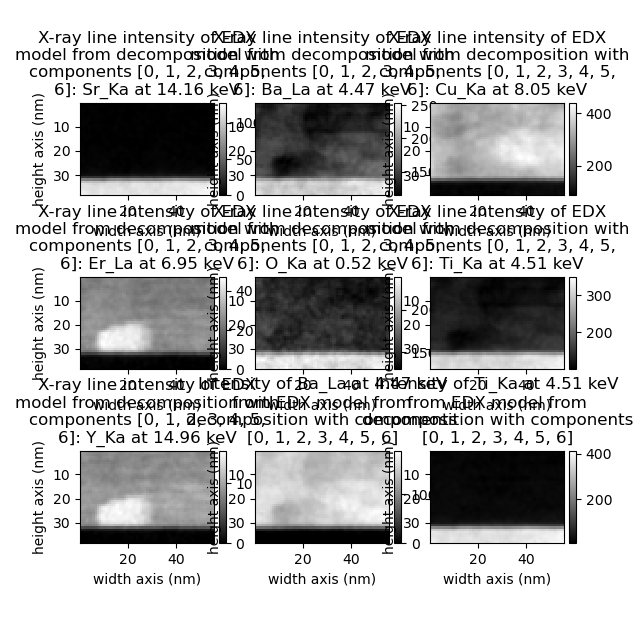

In [6]:
# Check default settings
hs.plot.plot_images(s)

[<Axes: title={'center': 'Sr_Ka at 14.16 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ba_La at 4.47 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Cu_Ka at 8.05 keV'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>]

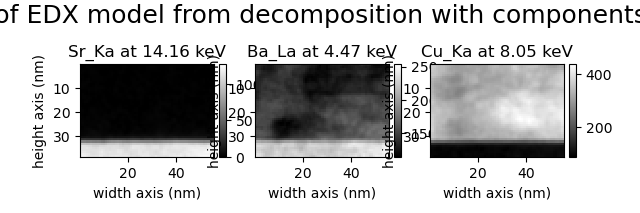

In [7]:
# Plot only first 3 maps, choose with list indexing
hs.plot.plot_images(s[:3])

Let's add some colors and options!

[<Axes: title={'center': 'Sr_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ba_La'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Cu_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Er_La'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'O_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ti_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Y_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ba_La'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ti_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>]

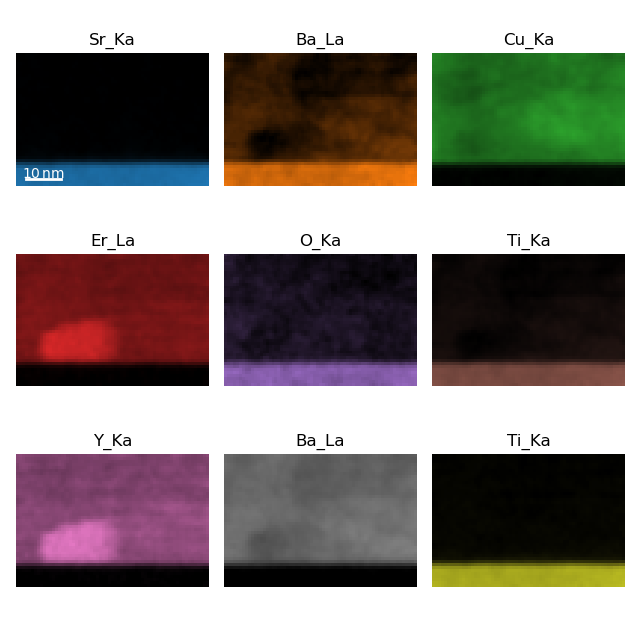

In [8]:
# Get the names of the x-ray transitions as subplot labels
labels = [signal.metadata.Sample.xray_lines[0] for signal in s]

# In Jupyter notebook, run SHIFT+TAB to get the docstring of a selected function
hs.plot.plot_images(s, cmap='mpl_colors', axes_decor='off',
                    label=labels, scalebar=[0], tight_layout=True,
                    colorbar=None)

For more control, we can access all matplotlib figure parameters afterward with `fig = plt.gcf()` (or alternatively create a figure before):

[6.4 6.4]


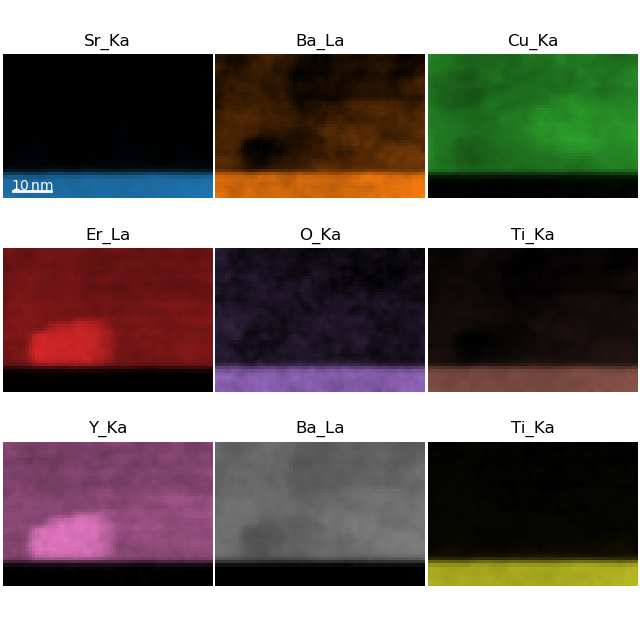

In [9]:
# Get the names of the x-ray transitions as subplot labels
labels = [signal.metadata.Sample.xray_lines[0] for signal in s]

# In Jupyter notebook, run SHIFT+TAB to get the docstring of a selected function
hs.plot.plot_images(s, cmap='mpl_colors', axes_decor='off',
                    label=labels, scalebar=[0], tight_layout=True,
                    colorbar=None)

# Example: Reduced white space with reduced padding and get current figsize
fig = plt.gcf()
fig.tight_layout(pad=0.2)
print(fig.get_size_inches())

In interactive matplotlib backends, you can resize the above figure and call tight_layout periodically to align everything:

In [14]:
# Resize last plot, call this cell in between
fig.tight_layout(pad=0.2)
figsize_new = fig.get_size_inches()
print(figsize_new)

[7.22 6.3 ]


If you are happy with the figure, save it with current settings:

In [11]:
fig.savefig('Elemental_maps_01.png', dpi=600)
fig.savefig('Elemental_maps_01.svg')

Next time, we can directly create the figure with the interactively found size. We specify the figure in the `plot_images` arguments:


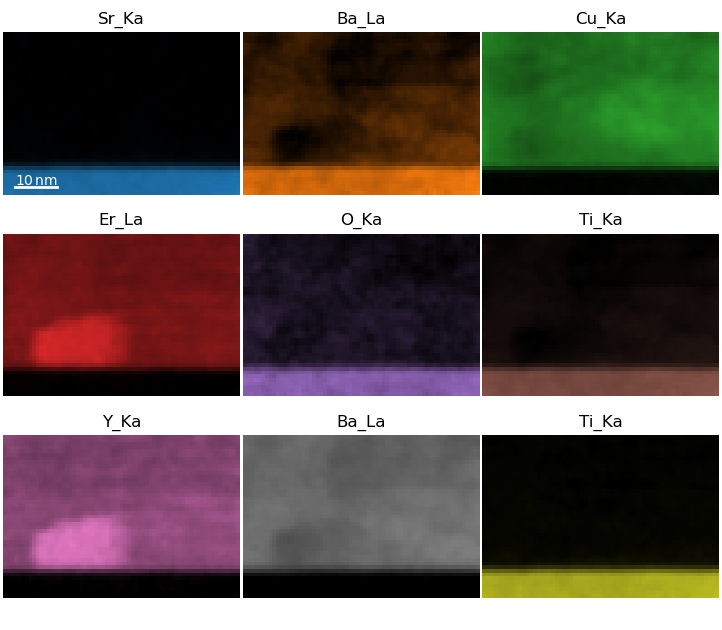

In [15]:
# Create a figure with desired size
fig = plt.figure(figsize=figsize_new)

# Get the names of the x-ray transitions as subplot labels
labels = [signal.metadata.Sample.xray_lines[0] for signal in s]

# In Jupyter notebook, run SHIFT+TAB to get the docstring of a selected function
hs.plot.plot_images(s, cmap='mpl_colors', axes_decor='off',
                    label=labels, scalebar=[0], tight_layout=True,
                    colorbar=None, fig=fig)
fig.tight_layout(pad=0.2)

Besides the whole figure, we can also access individual maps which are matplotlib axes objects:

In [17]:
# Get axes in a list object
axs = fig.axes
axs

[<Axes: title={'center': 'Sr_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ba_La'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Cu_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Er_La'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'O_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ti_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Y_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ba_La'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>,
 <Axes: title={'center': 'Ti_Ka'}, xlabel='width axis (nm)', ylabel='height axis (nm)'>]

For example, we can get (and change) parameters of the first axis:

In [18]:
img = axs[0].get_images()[0]

In [19]:
# Registered name of the first matplotlib tab10 color orange
img.cmap.name

'mpl0'

In [20]:
# Change to another linear segmented colormap
img.set_cmap('cividis')

In [21]:
# Change it back
img.set_cmap('mpl0')

# Creating custom color maps using the glasbey package

Elemental maps are typically plotted with a linear segmented colormap ranging from black (= no element signal) to a color (= element signal).  
HyperSpy by default uses matplotlib's `tab10` set when cycling through the colors with the `plot_images` function.  
Here, we show how to implement different colormaps using the **glasbey** package (https://github.com/lmcinnes/glasbey).  
In this way, we can create a nice set of distinct colors with easily adjustable parameters, e.g., brighter colors than `tab10` or a larger amount of colors if you want to display > 10 elemental maps at once.

This is the default setting using `tab10`:

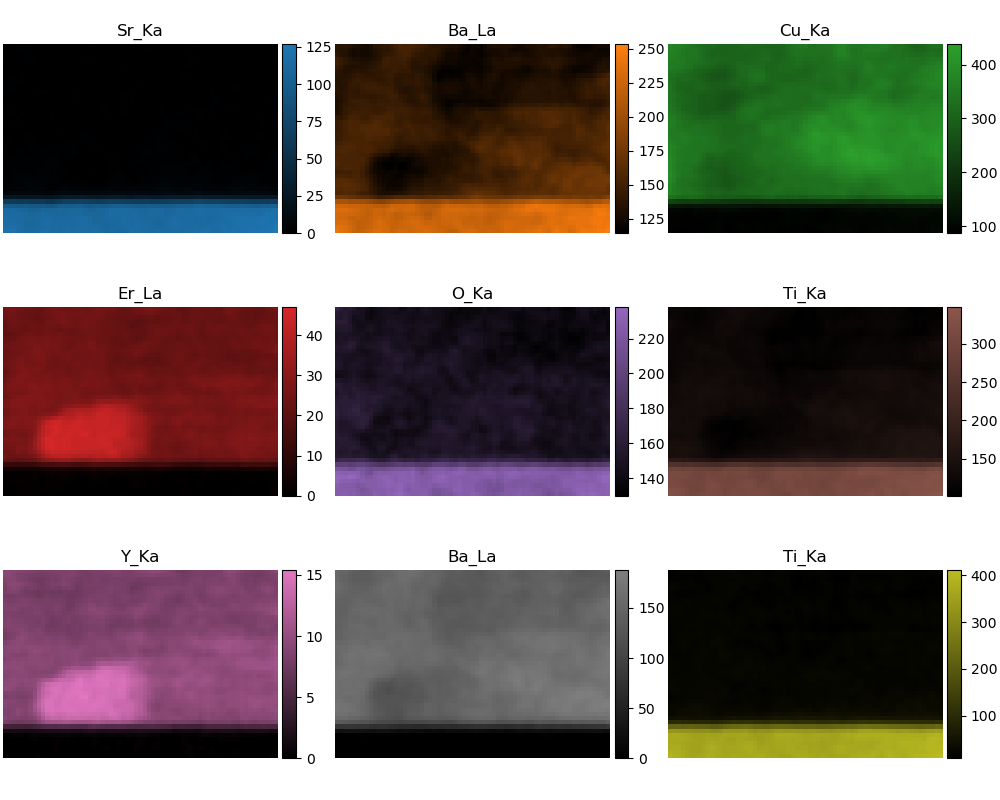

In [22]:
fig = plt.figure(figsize=(10,8))

labels = [signal.metadata.Sample.xray_lines[0] for signal in s]

hs.plot.plot_images(s, cmap='mpl_colors', axes_decor='off', label=labels, fig=fig)
fig.tight_layout(pad=0.2)

Let's create a color palette with glasbey.  
Take a look at the glasbey documentation (https://github.com/lmcinnes/glasbey) for info on the parameters. You can also extend an existing color set.

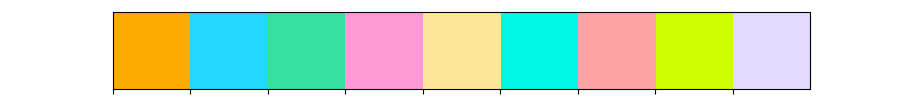

In [30]:
num_colors = len(s)
lightness_bounds = (70, 90) # default = (10, 90)
chroma_bounds = (10, 90) # default = (10, 90)
hue_bounds = (0, 360) # default = (0, 360)
colorblind_safe = True # default = False

colors_rgb = glasbey.create_palette(palette_size=num_colors, lightness_bounds=lightness_bounds, chroma_bounds=chroma_bounds, hue_bounds=hue_bounds, colorblind_safe=colorblind_safe, as_hex=False)
colors_hex = glasbey.create_palette(palette_size=num_colors, lightness_bounds=lightness_bounds, chroma_bounds=chroma_bounds, hue_bounds=hue_bounds, colorblind_safe=colorblind_safe)

sns.palplot(colors_hex)

In [31]:
print('Colors in hex values:')
for line,col in zip(labels, colors_hex):
    print(line, '\t', col)

Colors in hex values:
Sr_Ka 	 #ffaa00
Ba_La 	 #20d7ff
Cu_Ka 	 #35df9e
Er_La 	 #ff9ad7
O_Ka 	 #ffe79a
Ti_Ka 	 #00f7e3
Y_Ka 	 #ffa2a6
Ba_La 	 #ceff00
Ti_Ka 	 #e3dbff


Generate colormaps and register them in matplotlib as colormaps:

In [32]:
my_cmaps = []
for i,color in enumerate(colors_rgb):
    color_tuple_min_max = [(0,0,0), color]
    mpl_cmap_name = f'my_cmap_{i}'
    matplotlib.colormaps.unregister(mpl_cmap_name)
    my_cmaps.append(hyperspy.drawing.utils.make_cmap(color_tuple_min_max, name=mpl_cmap_name, register=True))

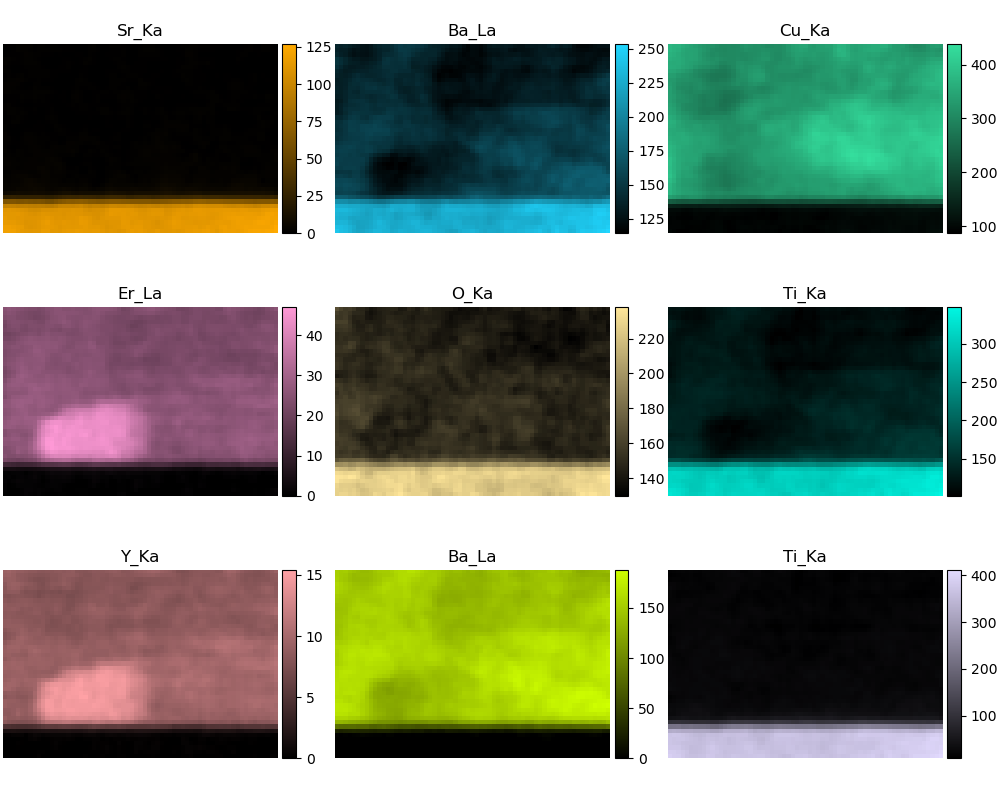

In [33]:
fig = plt.figure(figsize=(10,8))

labels = [signal.metadata.Sample.xray_lines[0] for signal in s]

hs.plot.plot_images(s, cmap=my_cmaps, axes_decor='off', label=labels, fig=fig)
fig.tight_layout(pad=0.2)